In [5]:
from scapy.all import *

packets = sniff(offline='./sample.pcapng')

In [ ]:
# 1. Quantidade de ARP Requests
arp_requests = 0
for packet in packets:
  if (ARP in packet
      and packet['ARP'].op == 1):
    arp_requests += 1

print(arp_requests)

In [ ]:
# 2. Quantidade de ARP Replies
arp_replies = 0
for packet in packets:
  if (ARP in packet
      and packet['ARP'].op == 2):
    arp_replies += 1

print(arp_replies)

In [ ]:
# 3. Quantidade de pacotes TCP
tcp_packets = 0
for packet in packets:
  if (TCP in packet):
    tcp_packets += 1

print(tcp_packets)

In [ ]:
# 4. Quantidade de pacotes relacionados a HTTP
http_packets = 0
for packet in packets:
  if (packet.haslayer(TCP)):
    if (packet['TCP'].sport == 80 or packet['TCP'].dport == 80):
      http_packets += 1
    elif (packet.haslayer(Raw)):
      try:
        raw = packet['Raw'].load.decode('UTF-8')
        if ('HTTP' in raw):
          http_packets += 1
      except:
        pass

print(http_packets)

In [ ]:
# 5. Quantidade de queries HTTP get
http_get_packets = 0
for packet in packets:
  if (packet.haslayer(TCP) and packet.haslayer(Raw)):
    try:
      raw = packet['Raw'].load.decode('UTF-8')
      if (raw.startswith('GET ')):
        http_get_packets += 1
    except:
      pass

print(http_get_packets)

In [ ]:
# 6. Quantidade de novas conexões SSH
new_ssh_connections = 0
for packet in packets:
  if (packet.haslayer(TCP) and packet['TCP'].dport == 22):
    if (packet.haslayer(Raw)):
      raw = packet['Raw'].load
      if (len(raw) > 6):
        ssh_packet_length = int.from_bytes(raw[:4], 'big')
        if (len(raw[4:]) == ssh_packet_length):
          ssh_padding_length = raw[4]
          if (len(raw[6:]) == ssh_padding_length):
            message_code = raw[5]
            if (message_code == 21):
              new_ssh_connections += 1

print(new_ssh_connections)

In [ ]:
# 7. Quantidade de requisições DNS
dns_queries = 0
for packet in packets:
  if (packet.haslayer(DNS)
      and packet['DNS'].qr == 0):
    dns_queries += 1

print(dns_queries)

In [ ]:
# 8. Usuários logados em sessão telnet
telnet_tries = 0
for packet in packets:
  if (packet.haslayer(TCP) and packet['TCP'].sport == 23):
    if (packet.haslayer(Raw)):
      try:
        raw = packet['Raw'].load
        if (b'Password:' in raw):
          telnet_tries += 1
      except:
        pass

print(telnet_tries)

In [ ]:
# 9. Quantidade de protocolos de aplicação distintos
distinct_ports_tcp = set()
distinct_ports_udp = set()
for packet in packets:
  if (packet.haslayer(TCP)):
    if (packet['TCP'].dport < 1024):
      distinct_ports_tcp.add(packet['TCP'].dport)
    elif (packet['TCP'].sport < 1024):
      distinct_ports_tcp.add(packet['TCP'].sport)
  elif (packet.haslayer(UDP)):
    if (packet['UDP'].dport < 1024):
      distinct_ports_udp.add(packet['UDP'].dport)
    elif (packet['UDP'].sport < 1024):
      distinct_ports_udp.add(packet['UDP'].sport)

print(len(distinct_ports_tcp) + len(distinct_ports_udp))

In [ ]:
# 10. Ataques de rede

arp_requests = 0
arp_replies = 0
for packet in packets:
  if (packet.haslayer(ARP)):
    if (packet['ARP'].op == 1):
      arp_requests += 1
    else:
      arp_replies += 1

print(arp_requests, arp_replies)

#####################################

syn = 0
syn_ack = 0
for packet in packets:
  if (packet.haslayer(TCP)):
    if (packet['TCP'].flags == 2):
      syn += 1
    elif (packet['TCP'].flags == 18):
      syn_ack += 1

print(syn, syn_ack)

In [15]:
import matplotlib.pyplot as plt

88
81


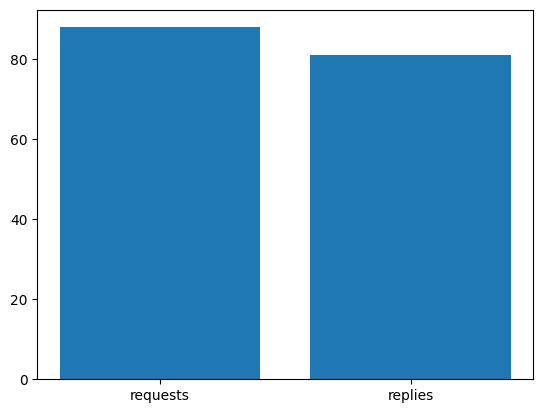

In [16]:
# 1. Gráfico com a relação entre ARP Request vs. ARP Reply
arp_requests = 0
arp_replies = 0
for packet in packets:
  if (packet.haslayer(ARP)):
    if (packet['ARP'].op == 1):
      arp_requests += 1
    else:
      arp_replies += 1

print(arp_requests)
print(arp_replies)

plt.bar(['requests', 'replies'], [arp_requests, arp_replies])
plt.show()

373
312


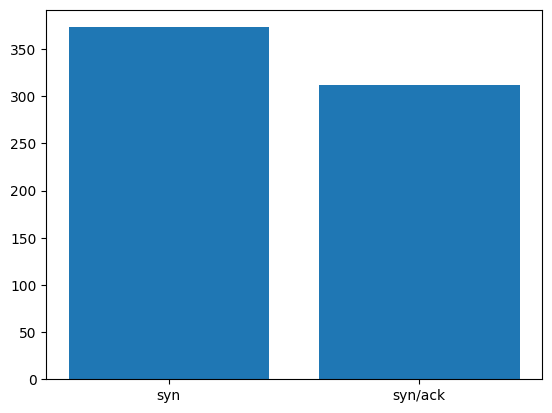

In [17]:
# 2. Gráfico com a relação entre SYN vs. SYN/ACK
syn = 0
syn_ack = 0
for packet in packets:
  if (packet.haslayer(TCP)):
    if (packet['TCP'].flags == 2):
      syn += 1
    elif (packet['TCP'].flags == 18):
      syn_ack += 1

print(syn)
print(syn_ack)

plt.bar(['syn', 'syn/ack'], [syn, syn_ack])
plt.show()

2447
8374
17442


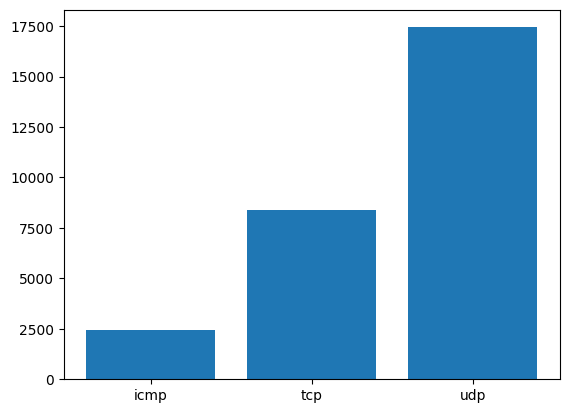

In [18]:
# 3. Gráfico com a relação entre a quantidade de mensagens ICMP vs. TCP vs. UDP
icmp = 0
tcp = 0
udp = 0
for packet in packets:
  if (packet.haslayer(ICMP)):
    icmp += 1
  elif (packet.haslayer(TCP)):
    tcp += 1
  elif (packet.haslayer(UDP)):
    udp += 1

print(icmp)
print(tcp)
print(udp)

plt.bar(['icmp', 'tcp', 'udp'], [icmp, tcp, udp])
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 5, 0, 0, 0, 6, 0, 10, 0, 0, 0, 0, 0, 0, 0, 86, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 3, 0, 0, 1, 49, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 15, 5, 6, 6, 5, 0, 6, 10, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 9, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 1, 0, 2

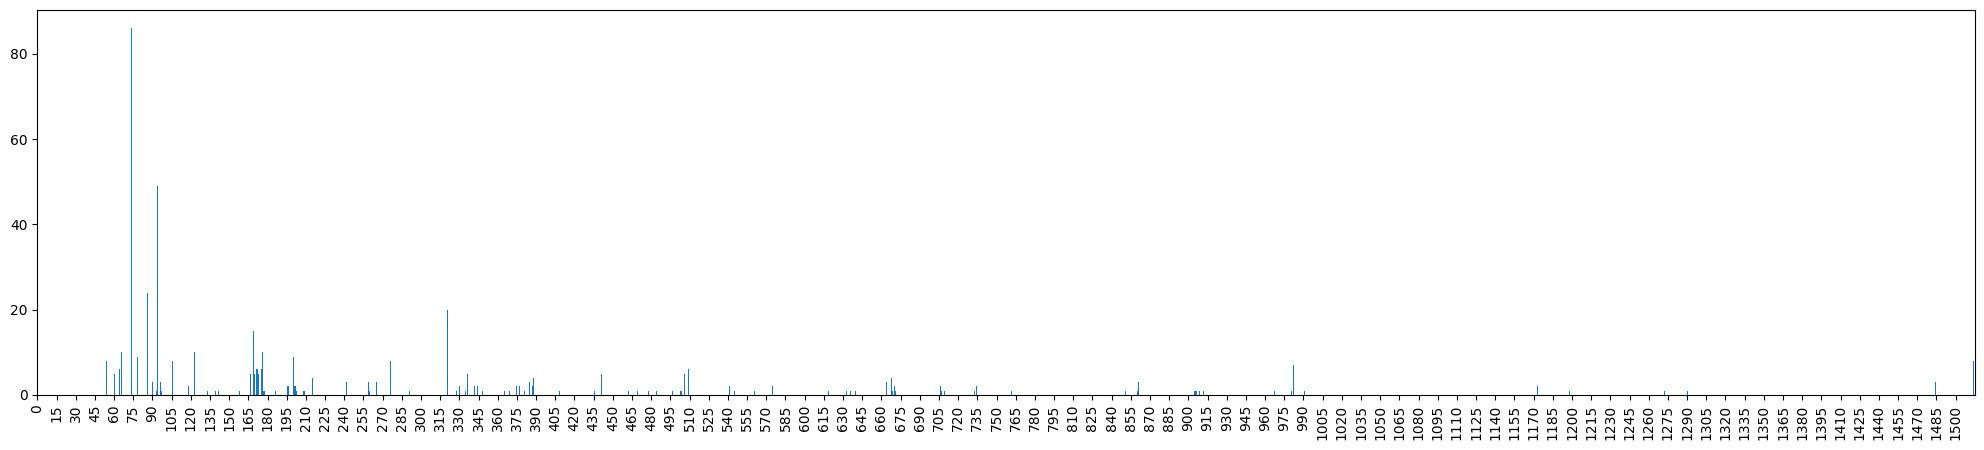

In [156]:
# 4. Histograma do tamanho dos pacotes HTTP
packets_per_size = [0 for _ in range(1515)]
for packet in packets:
  if (packet.haslayer(TCP)
      and (packet['TCP'].dport == 80 or packet['TCP'].sport == 80)):
    packets_per_size[len(packet)] += 1
  elif (packet.haslayer(Raw)):
      try:
        raw = packet['Raw'].load.decode('UTF-8')
        if ('HTTP' in raw):
          packets_per_size[len(packet)] += 1
      except:
        pass

print(packets_per_size)

plt.figure(figsize=(25,5))
plt.bar([i for i in range(1515)], packets_per_size)
plt.xticks(range(0, 1515, 15), rotation=90)
plt.xlim(0, 1515)
plt.show()

{646: 76, 179: 493, 80: 271, 443: 497, 25: 117, 53: 480, 22: 598, 143: 45, 901: 3, 43: 459, 23: 162, 631: 1183, 515: 47, 21: 396, 514: 339, 601: 199, 7: 31, 9: 26, 13: 32, 19: 358, 37: 16, 49: 69}


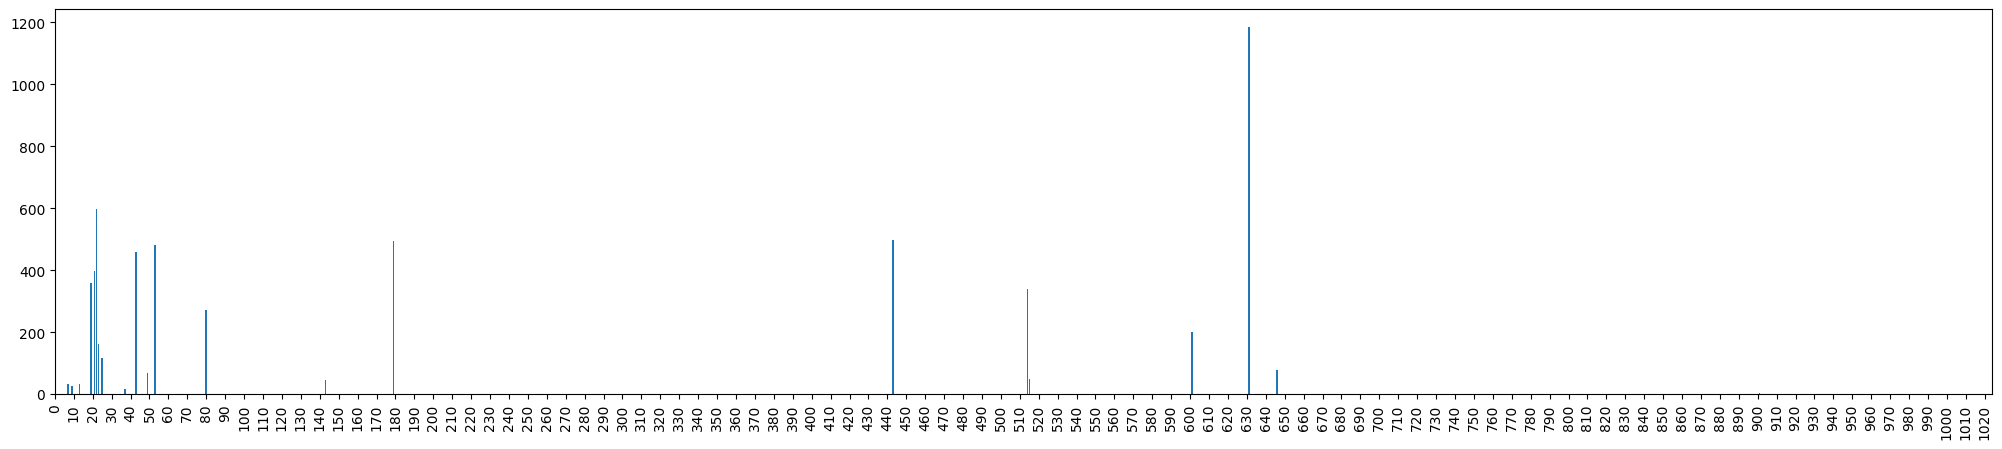

In [153]:
# 5. Gráfico com a quantidade de mensagens por protocolo de aplicação
packets_per_protocol = {}
for packet in packets:
  if (packet.haslayer(TCP)
      and (packet['TCP'].dport < 1024 or packet['TCP'].sport < 1024)):
    if (packet['TCP'].dport < 1024):
      port = packet['TCP'].dport
    else:
      port = packet['TCP'].sport

    if (port in packets_per_protocol):
      packets_per_protocol[port] += 1
    else:
      packets_per_protocol[port] = 1

print(packets_per_protocol)

plt.figure(figsize=(25,5))
plt.bar(packets_per_protocol.keys(), packets_per_protocol.values())
plt.xticks(range(0, 1024, 10), rotation=90)
plt.xlim(0, 1024)
plt.show()

{'192.168.2.102': 7, '192.168.110.9': 25, '194.25.0.68': 3, '192.168.120.21': 4, '192.168.90.10': 11, '74.125.47.13': 1, '74.125.73.76': 1, '74.125.73.83': 1, '192.168.121.2': 15, '2003:51:6012:121::2': 1, '192.168.7.26': 81, 'fe80::80e:eec7:c1a2:f441': 80, '192.168.7.12': 1, '2003:de:2016:125:fc36:8317:4e86:cb72': 4, '2003:de:2016:110::b15:22': 2, '192.168.120.22': 34, '2003:de:2016:120::a08:53': 28, '2620:171:f8:f0::7': 3, '2001:470:1f0b:16b0:20c:29ff:fe7c:a4cb': 14, '2400:cb00:71:1024::a29e:57c6': 1, '2003:180:2:4000:53:0:11:1': 2, '2620:171:f8:f0::10': 1, '2003:180:2:4000:53:0:12:1': 2, '172.217.40.76': 1, '2a00:1450:4013:c03::10a': 1, '2a00:1450:4013:c06::105': 1, '173.194.169.104': 1, '2a00:1450:400c:c00::106': 1, '74.125.47.136': 1, '2a00:1450:4013:c05::10e': 1, '194.247.5.6': 2, '193.24.227.230': 244, '2001:470:765b::b15:22': 170, '2620:fe::fe': 1, '192.168.11.27': 9, 'fe80::ca4:b90c:5dad:e86b': 9, '2001:470:1f0b:16b0:221:70ff:feb2:e6c': 2, '193.24.225.56': 1, '2001:470:7feb:0:

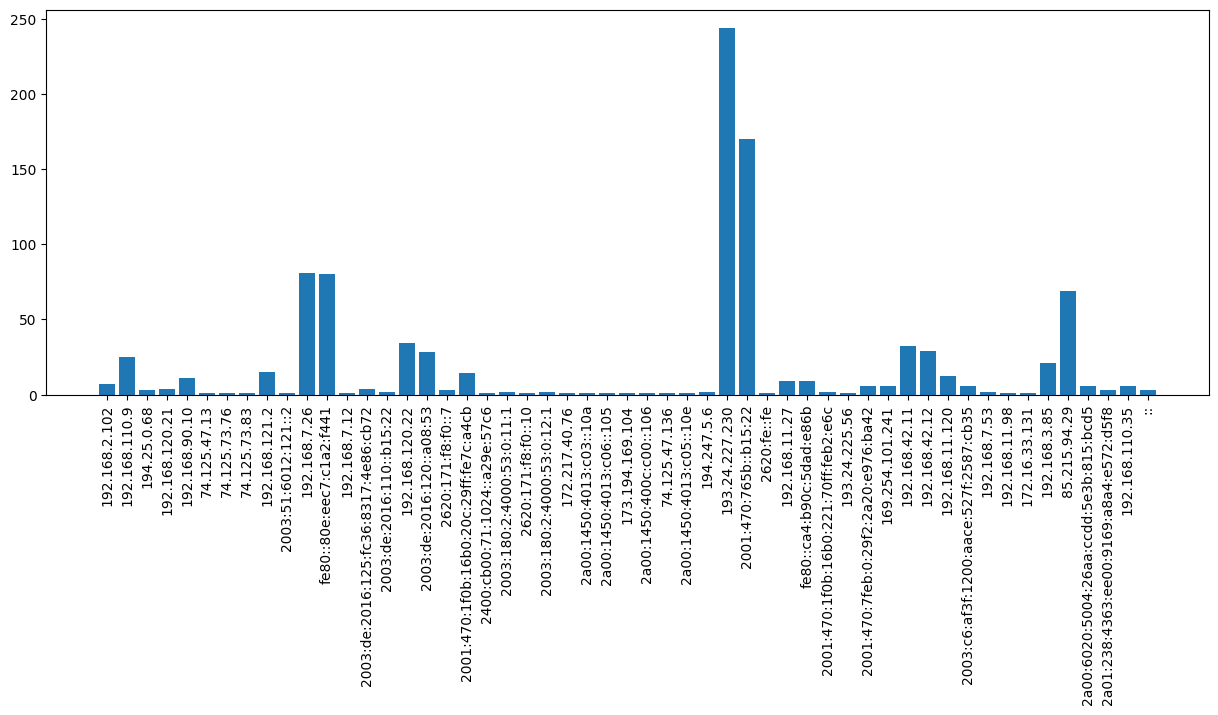

In [51]:
# 6. Gráfico com a quantidade de DNS queries efetuadas por IP
dns_queries_per_ip = {}
for packet in packets:
  if (packet.haslayer(DNS)
      and packet['DNS'].qr == 0):
    if (packet.haslayer(IPv6)):
      ip = packet['IPv6'].src
    else:
      ip = packet['IP'].src

    if (ip in dns_queries_per_ip):
      dns_queries_per_ip[ip] += 1
    else:
      dns_queries_per_ip[ip] = 1

print(dns_queries_per_ip)

plt.figure(figsize=(15,5))
plt.bar(dns_queries_per_ip.keys(), dns_queries_per_ip.values())
plt.xticks(rotation=90)
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 4, 1, 4, 35, 22, 0, 0, 23, 6, 6, 21, 54, 17, 7, 15, 25, 27, 11, 7, 15, 18, 3, 33, 17, 14, 9, 4, 2, 7, 9, 6, 32, 12, 5, 16, 15, 16, 6, 7, 9, 15, 7, 10, 12, 20, 12, 0, 1, 0, 9, 9, 8, 6, 1, 5, 0, 1, 0, 7, 3, 7, 30, 3, 12, 3, 4, 0, 7, 1, 1, 1, 4, 1, 5, 1, 0, 2, 0, 0, 3, 18, 0, 3, 0, 1, 5, 0, 6, 0, 3, 0, 11, 0, 0, 0, 2, 1, 0, 1, 0, 14, 0, 0, 0, 26, 2, 0, 3, 0, 3, 0, 0, 3, 0, 0, 2, 10, 0, 0, 4, 0, 0, 0, 0, 25, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 9, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 9, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 9, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 

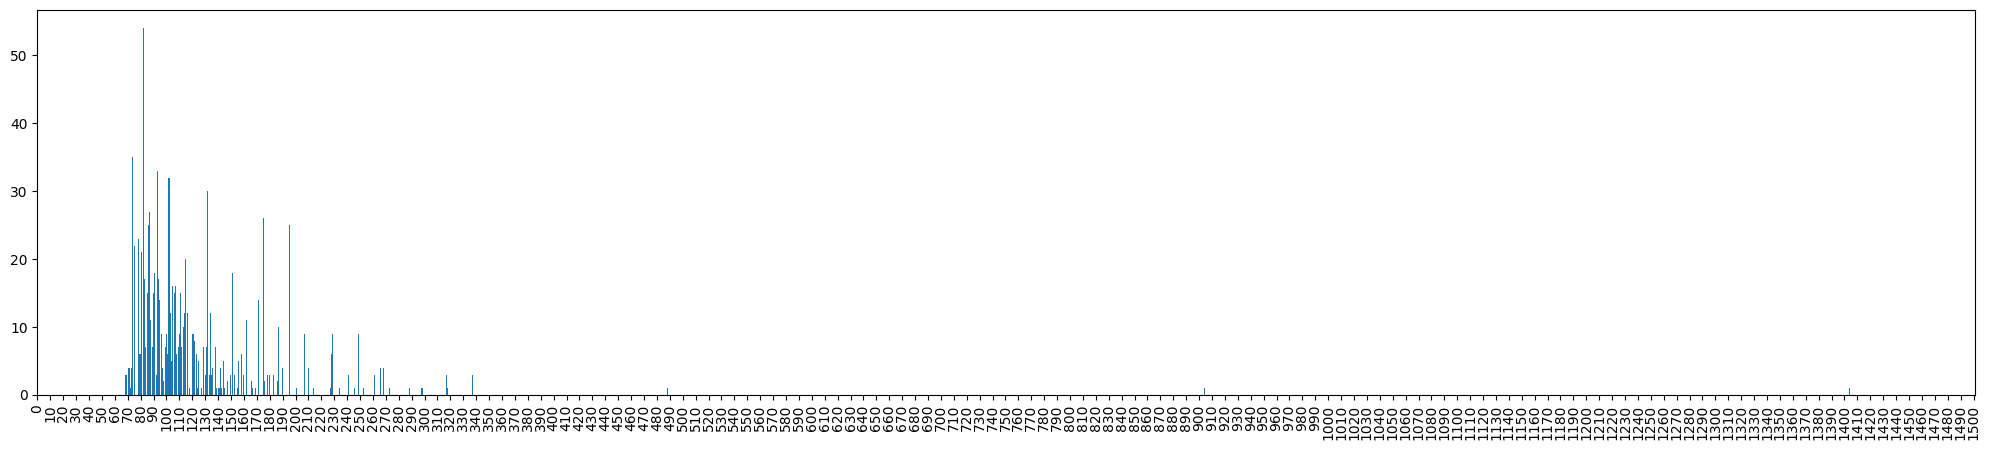

In [172]:
# 7. Histograma do tamanho das mensagens de DNS queries
packets_per_size = [0 for _ in range(1501)]
for packet in packets:
  if (packet.haslayer(DNS)
      and packet['DNS'].qr == 0):
    packets_per_size[len(packet)] += 1

print(packets_per_size)

plt.figure(figsize=(25,5))
plt.bar([i for i in range(1501)], packets_per_size)
plt.xticks(range(0, 1501, 10), rotation=90)
plt.xlim(0, 1501)
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 90, 0, 0, 0, 0, 0, 39, 0, 21, 0, 265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 107, 0, 8, 0, 18, 0, 7, 0, 3, 0, 0, 0, 1815, 0, 0, 0, 40, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

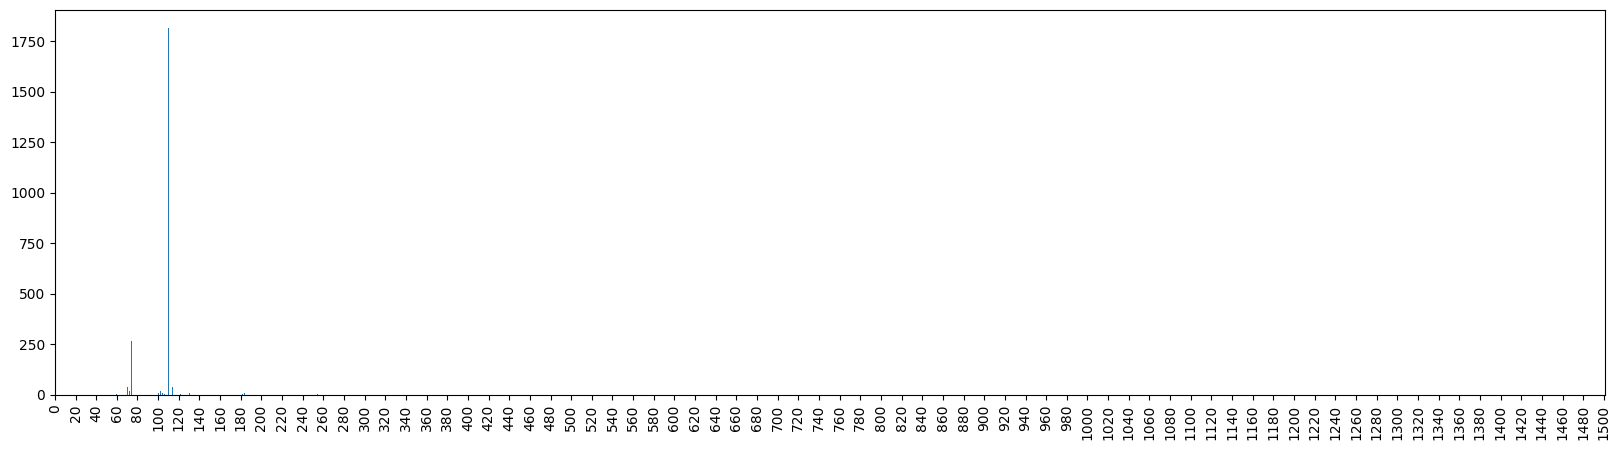

In [178]:
# 8. Histograma do tamanho das mensagens de ICMP
packets_per_size = [0 for _ in range(1501)]
for packet in packets:
  if (packet.haslayer(ICMP)):
    packets_per_size[len(packet)] += 1

print(packets_per_size)

plt.figure(figsize=(20,5))
plt.bar([i for i in range(1501)], packets_per_size)
plt.xticks(range(0, 1501, 20), rotation=90)
plt.xlim(0, 1501)
plt.show()